## Libraries

In [36]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()

## Load Data

In [2]:
raw_data = pd.read_csv('Influencer.csv')

In [3]:
raw_data

,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,\nkhabib_nurmagomedov,63,33.6m,680.6k,4.6k,0.009,305.7k,3.1b,Russia
196,197,\ndanbilzerian,84,33.6m,2.2m,1.4k,0.064,2.1m,3.0b,Canada
197,198,\nraisa6690,80,33.6m,227.8k,4.2k,0.003,103.2k,955.9m,Indonesia
198,199,\nluansantana,79,33.5m,193.3k,865,0.003,82.6k,167.2m,Brazil


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    object 
 4   Avg. Likes           200 non-null    object 
 5   Posts                200 non-null    object 
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    object 
 8   Total Likes          200 non-null    object 
 9   Country Or Region    137 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB


In [5]:
data = raw_data.copy()

In [10]:
numeric_columns = ['Followers', 'Avg. Likes', 'Posts', '60-Day Eng Rate', 'New Post Avg. Likes', 'Total Likes']
for col in numeric_columns:
    if data[col].dtype == 'object':
        data[col] = pd.to_numeric(data[col].str.replace(r'[^\d\.\-]', '', regex=True)
                                  .str.replace('b', 'e9', regex=True)
                                  .str.replace('m', 'e6', regex=True)
                                  .str.replace('k', 'e3', regex=True))
    

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rank                 200 non-null    int64  
 1   Channel Info         200 non-null    object 
 2   Influence Score      200 non-null    int64  
 3   Followers            200 non-null    float64
 4   Avg. Likes           200 non-null    float64
 5   Posts                200 non-null    float64
 6   60-Day Eng Rate      200 non-null    float64
 7   New Post Avg. Likes  200 non-null    float64
 8   Total Likes          200 non-null    float64
 9   Country Or Region    137 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 15.8+ KB


In [12]:
data.describe()

,Rank,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,81.850000,78.491000,231.605000,147.241500,0.019160,253.055000,133.963500
std,57.879185,8.875323,74.920155,307.023992,285.424707,0.032577,274.660102,265.243532
min,1.000000,22.000000,33.400000,1.000000,1.000000,0.000000,0.000000,1.000000
25%,50.750000,80.000000,40.675000,1.900000,2.300000,0.004000,4.425000,2.000000
50%,100.500000,84.000000,50.950000,7.450000,5.300000,0.009500,161.900000,3.800000
75%,150.250000,86.000000,70.500000,414.450000,61.500000,0.017250,431.975000,21.300000
max,200.000000,93.000000,485.200000,989.600000,992.000000,0.250000,989.200000,958.900000


In [16]:
corr_Finder = data.drop(['Channel Info','Country Or Region'], axis = 1)

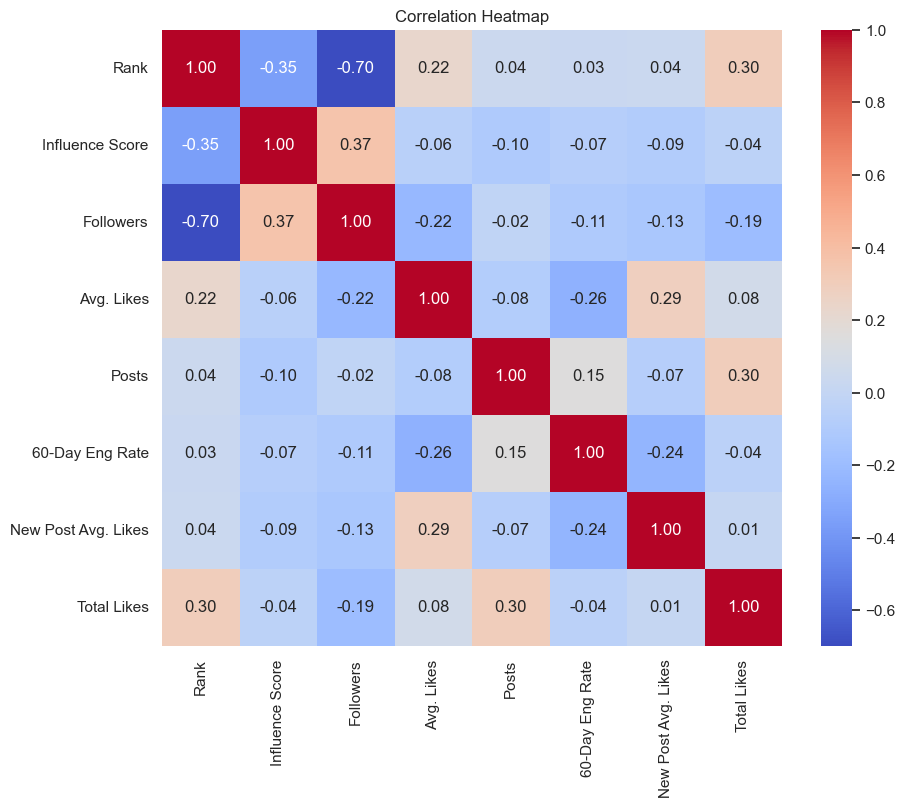

In [17]:
# Calculate correlation matrix
correlation_matrix = corr_Finder.corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [23]:
# Set a threshold for considering correlations as highly correlated
threshold = 0.5

# Iterate through the correlation matrix and print highly correlated pairs
highly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            highly_correlated_pairs.append(pair)

# Print highly correlated pairs and their correlation coefficients
if len(highly_correlated_pairs) > 0:
    print("Highly correlated pairs:")
    for pair in highly_correlated_pairs:
        print(f"{pair[0]} and {pair[1]}: {pair[2]}")
else:
    print("No highly correlated pairs found.")

Highly correlated pairs:
Rank and Followers: -0.698192870519586


In [24]:
# Frequency distribution of Influence Score
influence_score_freq = data['Influence Score'].value_counts().reset_index().rename(columns={'index': 'Influence Score', 'Influence Score': 'Frequency'})

# Frequency distribution of Followers
followers_freq = data['Followers'].value_counts().reset_index().rename(columns={'index': 'Followers', 'Followers': 'Frequency'})

# Frequency distribution of Posts
posts_freq = data['Posts'].value_counts().reset_index().rename(columns={'index': 'Posts', 'Posts': 'Frequency'})

print("Frequency distribution of Influence Score:")
print(influence_score_freq)

print("\nFrequency distribution of Followers:")
print(followers_freq)

print("\nFrequency distribution of Posts:")
print(posts_freq)

Frequency distribution of Influence Score:
    Frequency  count
0          85     30
1          83     20
2          86     19
3          84     18
4          82     12
5          80     12
6          87      9
7          81      9
8          90      7
9          88      7
10         76      6
11         79      6
12         91      6
13         78      5
14         77      4
15         92      4
16         75      4
17         89      4
18         74      3
19         73      2
20         42      2
21         70      1
22         93      1
23         22      1
24         57      1
25         58      1
26         47      1
27         72      1
28         68      1
29         41      1
30         71      1
31         63      1

Frequency distribution of Followers:
     Frequency  count
0         36.0      3
1         33.6      3
2         68.1      3
3         33.8      3
4         52.9      3
..         ...    ...
167       64.7      1
168       64.4      1
169       63.6      1
170   

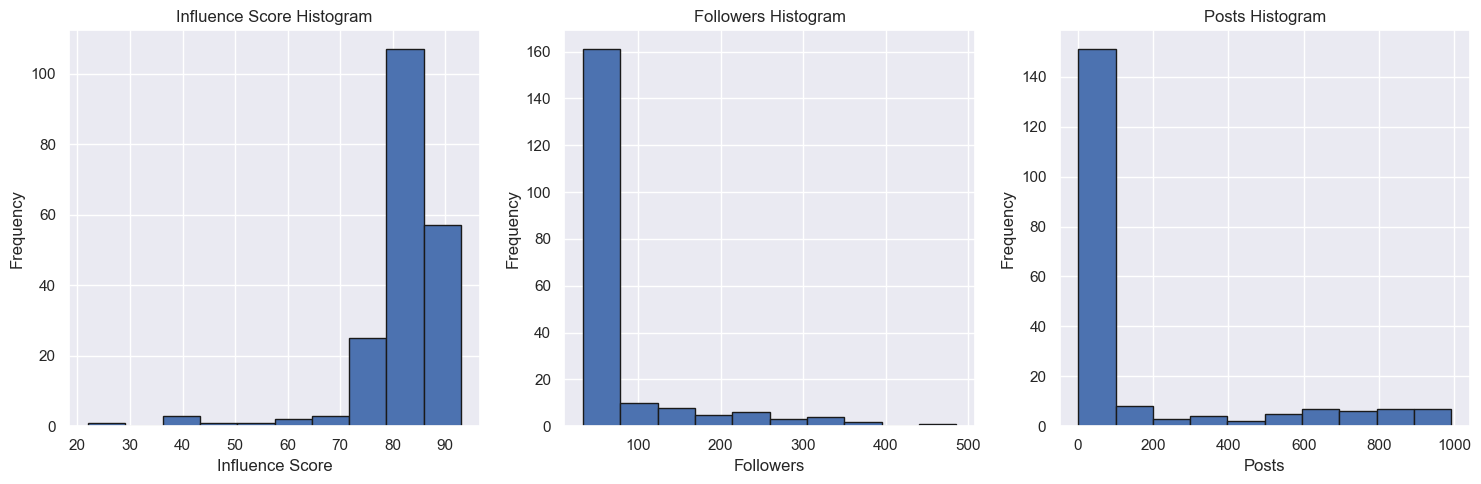

In [25]:
# Create subplots for histograms
plt.figure(figsize=(15, 5))

# Histogram for Influence Score
plt.subplot(1, 3, 1)
plt.hist(data['Influence Score'], bins=10, edgecolor='k')
plt.title('Influence Score Histogram')
plt.xlabel('Influence Score')
plt.ylabel('Frequency')

# Histogram for Followers
plt.subplot(1, 3, 2)
plt.hist(data['Followers'], bins=10, edgecolor='k')
plt.title('Followers Histogram')
plt.xlabel('Followers')
plt.ylabel('Frequency')

# Histogram for Posts
plt.subplot(1, 3, 3)
plt.hist(data['Posts'], bins=10, edgecolor='k')
plt.title('Posts Histogram')
plt.xlabel('Posts')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [26]:
from scipy import stats

# Calculate skewness for Influence Score
influence_score_skewness = stats.skew(data['Influence Score'])

# Calculate skewness for Followers
followers_skewness = stats.skew(data['Followers'])

# Calculate skewness for Posts
posts_skewness = stats.skew(data['Posts'])

print(f"Skewness of Influence Score: {influence_score_skewness}")
print(f"Skewness of Followers: {followers_skewness}")
print(f"Skewness of Posts: {posts_skewness}")


Skewness of Influence Score: -3.4524004652506624
Skewness of Followers: 2.7878808158523403
Skewness of Posts: 1.8065190553331745


The "Influence Score" feature has a negative skewness of approximately -3.45. This indicates a significant left or negative skew, meaning that the distribution is skewed towards lower values, and the left tail is longer or fatter than the right tail. In this case, the median is likely greater than the mean.

The "Followers" feature has a positive skewness of approximately 2.79. This indicates a significant right or positive skew, meaning that the distribution is skewed towards higher values, and the right tail is longer or fatter than the left tail. In this case, the mean is likely greater than the median.

The "Posts" feature has a positive skewness of approximately 1.81. This also indicates a right or positive skew, suggesting that the distribution is skewed towards higher values, and the right tail is longer or fatter than the left tail. Again, in this case, the mean is likely greater than the median.

In summary, the "Influence Score" is strongly left-skewed, while both "Followers" and "Posts" are right-skewed. Skewness values significantly away from 0 indicate pronounced skewness in the respective distributions.

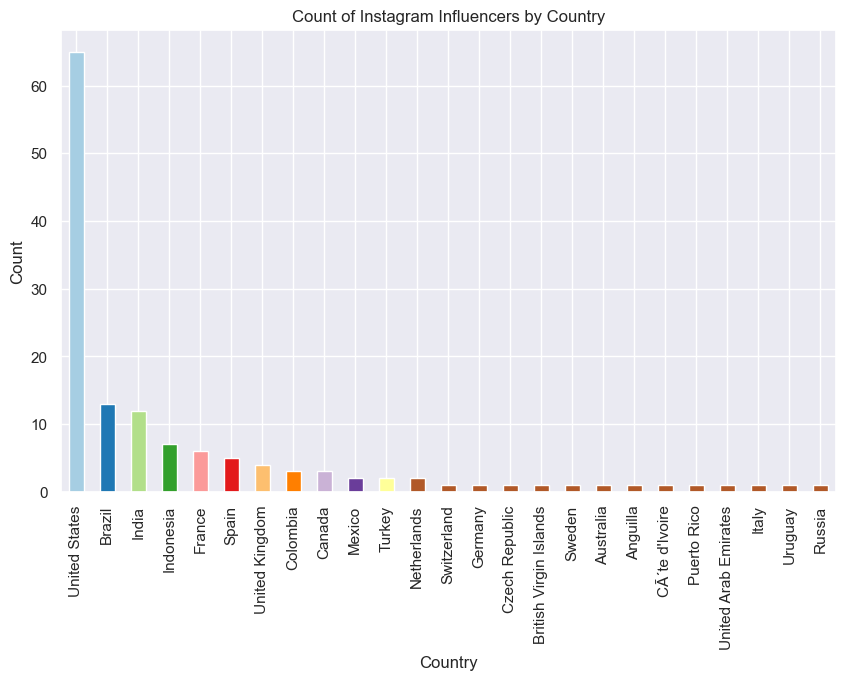

The country with the highest number of Instagram influencers is United States with 65 influencers.


In [31]:
# Group by country and count the number of influencers in each country
country_counts = data['Country Or Region'].value_counts()

# Define a color map for countries
colors = plt.cm.Paired(range(len(country_counts)))

# Plot the bar chart with different colors
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color=colors)
plt.title('Count of Instagram Influencers by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.show()

# Find the country with the highest number of influencers
country_with_highest_count = country_counts.idxmax()
print(f"The country with the highest number of Instagram influencers is {country_with_highest_count} with {country_counts.max()} influencers.")

In [33]:
# Sort by followers and get top 10
top_10_followers = data.sort_values(by='Followers', ascending=False).head(10)
top_10_followers = top_10_followers.set_index(pd.Index(range(10)))
# Sort by avg. likes and get top 10
top_10_avg_likes = data.sort_values(by='Avg. Likes', ascending=False).head(10)
top_10_avg_likes = top_10_avg_likes.set_index(pd.Index(range(10)))
# Sort by total likes and get top 10
top_10_total_likes = data.sort_values(by='Total Likes', ascending=False).head(10)
top_10_total_likes = top_10_total_likes.set_index(pd.Index(range(10)))

top_10_totals = pd.concat([top_10_followers['Channel Info'], 
                top_10_avg_likes['Channel Info'], 
                top_10_total_likes['Channel Info']], axis=1)
top_10_totals.columns = ['Top 10 Followers', 'Top 10 Average Likes','Top 10 Total Likes']
top_10_totals

,Top 10 Followers,Top 10 Average Likes,Top 10 Total Likes
0,\ncristiano,\nrealmadrid,\nhrithikroshan
1,kyliejenner,\neminem,\nraisa6690
2,\nleomessi,\nranveersingh,\nantogriezmann
3,\nselenagomez,\nsergioramos,\nvancityreynolds
4,\ntherock,\nShakira,\ndior
5,\narianagrande,\ntatawerneck,\ntheweeknd
6,\nkimkardashian,\nbrunamarquezine,\nlouisvuitton
7,\nbeyonce,\nkritisanon,\nmaisa
8,\nkhloekardashian,433,\nsachintendulkar
9,\njustinbieber,\nronaldinho,\nluissuarez9


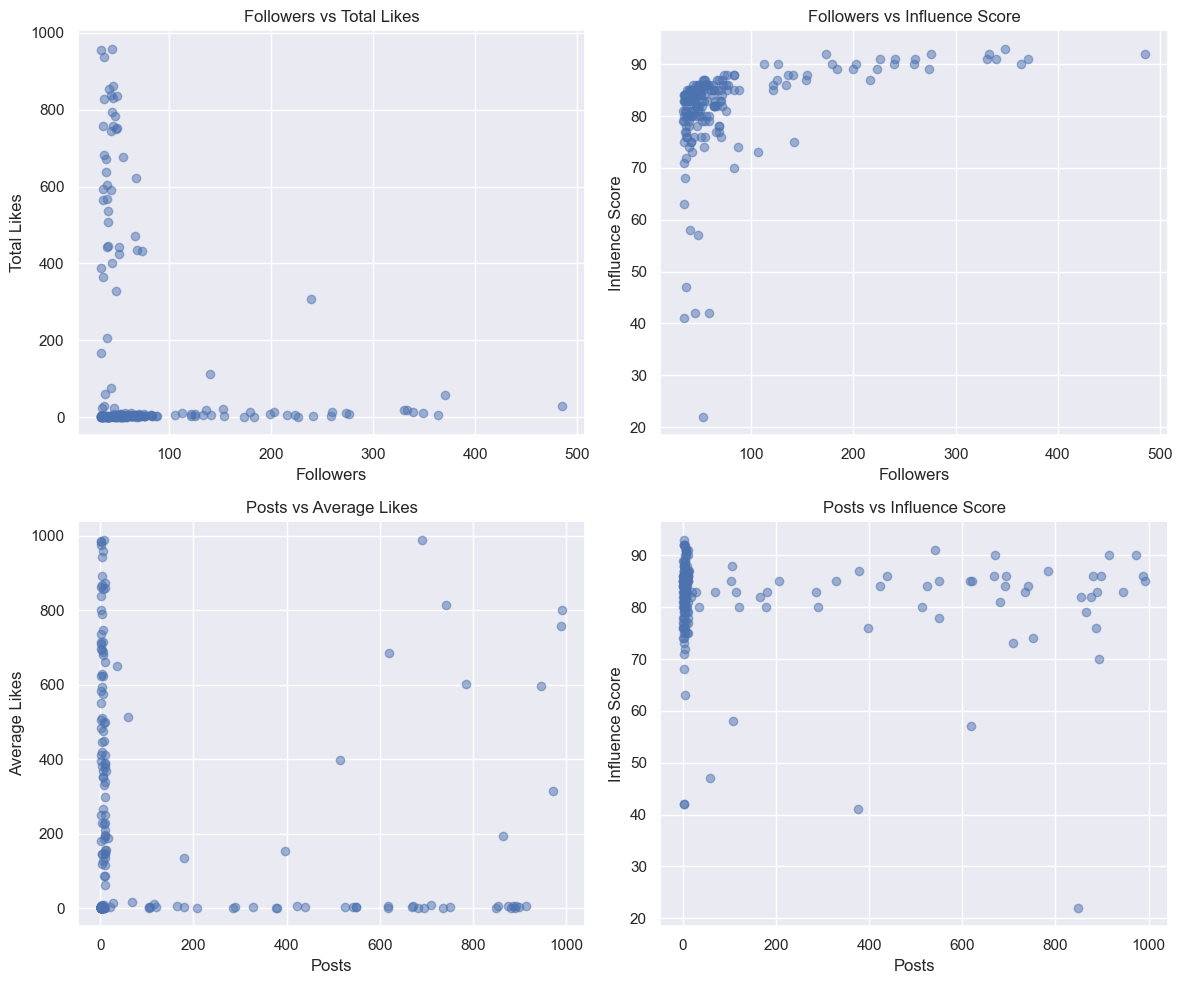

In [34]:

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot Followers vs Total Likes
axes[0, 0].scatter(data['Followers'], data['Total Likes'], alpha=0.5)
axes[0, 0].set_title('Followers vs Total Likes')
axes[0, 0].set_xlabel('Followers')
axes[0, 0].set_ylabel('Total Likes')

# Plot Followers vs Influence Score
axes[0, 1].scatter(data['Followers'], data['Influence Score'], alpha=0.5)
axes[0, 1].set_title('Followers vs Influence Score')
axes[0, 1].set_xlabel('Followers')
axes[0, 1].set_ylabel('Influence Score')

# Plot Posts vs Average Likes
axes[1, 0].scatter(data['Posts'], data['Avg. Likes'], alpha=0.5)
axes[1, 0].set_title('Posts vs Average Likes')
axes[1, 0].set_xlabel('Posts')
axes[1, 0].set_ylabel('Average Likes')

# Plot Posts vs Influence Score
axes[1, 1].scatter(data['Posts'], data['Influence Score'], alpha=0.5)
axes[1, 1].set_title('Posts vs Influence Score')
axes[1, 1].set_xlabel('Posts')
axes[1, 1].set_ylabel('Influence Score')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [38]:
# Create a DataFrame
df = pd.DataFrame(data)

# Calculate correlation coefficients
corr_followers_likes = np.corrcoef(df['Followers'], df['Total Likes'])[0, 1]
corr_followers_influence = np.corrcoef(df['Followers'], df['Influence Score'])[0, 1]
corr_posts_likes = np.corrcoef(df['Posts'], df['Total Likes'])[0, 1]
corr_posts_influence = np.corrcoef(df['Posts'], df['Influence Score'])[0, 1]

# Print correlation coefficients
print("Correlation coefficient between Followers and Total Likes:", corr_followers_likes)
print("Correlation coefficient between Followers and Influence Score:", corr_followers_influence)
print("Correlation coefficient between Posts and Average Likes:", corr_posts_likes)
print("Correlation coefficient between Posts and Influence Score:", corr_posts_influence)

Correlation coefficient between Followers and Total Likes: -0.19443722034615452
Correlation coefficient between Followers and Influence Score: 0.3654282853750103
Correlation coefficient between Posts and Average Likes: 0.2988262654550465
Correlation coefficient between Posts and Influence Score: -0.10179989002124425


- Correlation coefficient between Followers and Total Likes: -0.1944
  - Interpretation: There is a weak negative correlation between the number of followers an influencer has and the total number of likes they receive. This means that as the number of followers increases, the total likes tend to slightly decrease.

- Correlation coefficient between Followers and Influence Score: 0.3654
  - Interpretation: There is a moderate positive correlation between the number of followers an influencer has and their influence score. This suggests that, in general, influencers with a larger follower count tend to have a higher influence score.

- Correlation coefficient between Posts and Average Likes: 0.2988
  - Interpretation: There is a moderate positive correlation between the number of posts an influencer makes and the average number of likes they receive per post. This indicates that influencers who post more frequently tend to receive a higher average number of likes per post.

- Correlation coefficient between Posts and Influence Score: -0.1018
  - Interpretation: There is a weak negative correlation between the number of posts an influencer makes and their influence score. This implies that increasing the frequency of posts may have a slight negative impact on the influence score.
